# The Saint Petersberg paradox

This notebook contains an exploration of the Saint Petersberg paradox, first proposed by Daniel Bernoulli around 1738. See the [associated course materials](https://risk-engineering.org/risk-treatment-decisions/) for some background on the economic theory of risk aversion and decision-making and to download this content as a Jupyter/Python notebook. The notebook explains why stochastic simulation methods such as Monte Carlo are not suitable for situations where a very unlikely event has a significant impact on the output of interest in your simulations. 

## The rules of the game

You flip a coin repeatedly until a tail first appears. The pot starts at 1€ and doubles every time a head appears. You win whatever is in the pot the first time you throw tails and the game ends.
    
For example:

- T (tail on the first toss): win 1€
- H T (tail on the second toss): win 2€
- H H T: win 4€
- H H H T: win 8€

Which would you prefer?

- 10€ for sure
- the right to play the St. Petersberg game

## The expected value of playing

The expected value is the **mathematical expectation** of your winnings, or the amount you would win on average if you play the game a large number of times. The probability of throwing a tail on a given round:

- 1st round: $\Pr(Tails) = ½$
- 2nd round: $\Pr(Heads) × \Pr(Tails) = ¼$
- 3rd round: $\Pr(Heads) × \Pr(Heads) × \Pr(Tails) = \frac{1}{8}$
- $k^{th}$ round: $\frac{1}{2k}$

How much can you expect to win on average?

- with probability ½ you win 1€, ¼ you win 2€, $\frac{1}{8}$ you win 4€, $\frac{1}{16}$ you win 8€ …
- $\mathbb{E}(win) = ½ + ½ + ½ + … = ∞$

The expected value of the game is infinite, yet few people would be willing to pay more than 20€ to play: this is what’s known as “the St. Petersberg Paradox”. It led to the concept of *expected utility*, which is very important in economics.

## A Monte Carlo simulation of the expected value

Let’s try to estimate the expected value of this game using a stochastic simulation.

In [1]:
import numpy
import matplotlib.pyplot as plt
plt.style.use("bmh")
%config InlineBackend.figure_formats=["svg"]

def petersburg():
    winnings = 1
    while numpy.random.uniform() > 0.5:
        winnings *= 2
    return winnings

N = 1_000_000
games = numpy.zeros(N)
for i in range(N):
    games[i] = petersburg()

We expect the winnings to be very spread out, so we plot their distribution on a logarithmic scale instead of a linear scale.

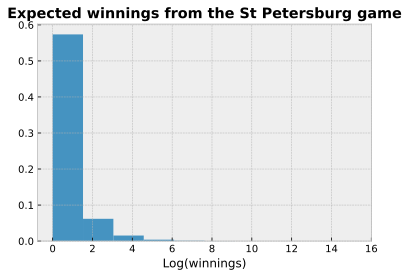

In [2]:
plt.hist(numpy.log(games), alpha=0.9, density=True)
plt.title("Expected winnings from the St Petersburg game", weight="bold")
plt.xlabel("Log(winnings)");

In [3]:
games.max()

4194304.0

In [5]:
games.mean()

14.983379

This game illustrates a situation where very unlikely events have an extremely high impact on the mean outcome: Monte Carlo simulation will not allow us to obtain a good estimation of the true (theoretical) expected value.

## The risk aversion explanation

Bernoulli suggested in 1738 that the “value” of a gamble is not its monetary value, but that people attach some subjective value, or *utility*, to monetary outcomes. Bernoulli’s suggestion: people do not seek to maximize expected values, but instead
maximize *expected utility*.

- marginal utility declines as wealth increases (poor people value increments in wealth more than rich people do)
      
- an individual is not necessarily twice as happy/satisfied getting 200€ compared to 100€

- people are “risk averse”

This is a possible explanation for why very few people are willing to pay anything close to the theoretical value of playing this game. 

## The “casino bust” explanation

Casinos are rich, but their riches are limited. Once you break their bank, they can’t pay out any more, and thus the expected return is finite. Let’s consider the case where the bank has a limit to their resources. We keep doubling the pot and halving the probability of winning the amount in the pot (half because you get the pot on a tail but not a head), until we reach the limit. 

(This section was inspired by [Peter Norvig’s notebook on probabilities and paradoxes](https://nbviewer.jupyter.org/url/norvig.com/ipython/ProbabilityParadox.ipynb).)

In [6]:
def petersburg_finite(limit):
    payoff = 1
    while numpy.random.uniform() > 0.5:
        payoff *= 2
        if payoff > limit:
            return limit
    return payoff

We can calculate the expected value of playing the Saint Petersburg game against a casino which has a finite limit to their bankroll. The expected value is the sum of the possible payoffs multiplied by their probabilities. 

In [7]:
def expectation_petersburg_finite(limit):
    expectation = 0
    payoff = 1
    probability = 1
    while payoff < limit:
        payoff *= 2
        probability *= 0.5
        expectation += payoff * probability
    return expectation

In [8]:
expectation_petersburg_finite(1e8)

27.0

So even with a fairly large casino bankroll of 100 million euros, the expected value of this limited game is only moderate. Would you pay 27€ to have the possibility to play this game? If not, perhaps the risk aversion explanation above remains relevant…